<a href="https://colab.research.google.com/github/leaHadj/ML-Project-2025/blob/main/notebook/Clash_Royal_ML_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clash Royale Deck Analysis and Match Outcome Prediction




# Phase 1 :

## 1. Importation of libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("Clash Royale Top Battles v1.csv")
df.head()  #Display first rows

,Unnamed: 0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p2_1,p2_2,p2_3,p2_4,p2_5,p2_6,p2_7,p2_8,p1_crowns,p2_crowns
0,0,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Graveyard,Ice Wizard,Baby Dragon,Barbarian Barrel,Tombstone,Knight,Tornado,Poison,0,1
1,1,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Wall Breakers,Valkyrie,Electro Wizard,Bats,Inferno Tower,The Log,Poison,Miner,1,0
2,2,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Golem,Tornado,Night Witch,Baby Dragon,Executioner,Barbarian Barrel,Lightning,Goblin Cage,1,2
3,3,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Elixir Golem,Zap,Tornado,Night Witch,Executioner,Goblin Cage,Mega Knight,Rocket,0,1
4,4,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Giant Snowball,Musketeer,Giant,Barbarian Barrel,Poison,Dark Prince,Night Witch,Graveyard,3,0


In [ ]:
#We add a new column, winner, for visualization
df["winner"] = (df["p1_crowns"] > df["p2_crowns"]).astype(int)
df.head()

,Unnamed: 0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p2_1,p2_2,p2_3,p2_4,p2_5,p2_6,p2_7,p2_8,p1_crowns,p2_crowns,winner
0,0,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Graveyard,Ice Wizard,Baby Dragon,Barbarian Barrel,Tombstone,Knight,Tornado,Poison,0,1,0
1,1,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Wall Breakers,Valkyrie,Electro Wizard,Bats,Inferno Tower,The Log,Poison,Miner,1,0,1
2,2,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Golem,Tornado,Night Witch,Baby Dragon,Executioner,Barbarian Barrel,Lightning,Goblin Cage,1,2,0
3,3,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Elixir Golem,Zap,Tornado,Night Witch,Executioner,Goblin Cage,Mega Knight,Rocket,0,1,0
4,4,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Giant Snowball,Musketeer,Giant,Barbarian Barrel,Poison,Dark Prince,Night Witch,Graveyard,3,0,1


## 2. Dataset analysis

In [ ]:
#Shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)
#Information about variable types
print("\nDataset info (types and non-null counts):")
df.info()


Dataset shape (rows, columns): (2311, 20)

Dataset info (types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2311 non-null   int64 
 1   p1_1        2311 non-null   object
 2   p1_2        2311 non-null   object
 3   p1_3        2311 non-null   object
 4   p1_4        2311 non-null   object
 5   p1_5        2311 non-null   object
 6   p1_6        2311 non-null   object
 7   p1_7        2311 non-null   object
 8   p1_8        2311 non-null   object
 9   p2_1        2311 non-null   object
 10  p2_2        2311 non-null   object
 11  p2_3        2311 non-null   object
 12  p2_4        2311 non-null   object
 13  p2_5        2311 non-null   object
 14  p2_6        2311 non-null   object
 15  p2_7        2311 non-null   object
 16  p2_8        2311 non-null   object
 17  p1_crowns   2311 non-null   int64 
 18  p2_

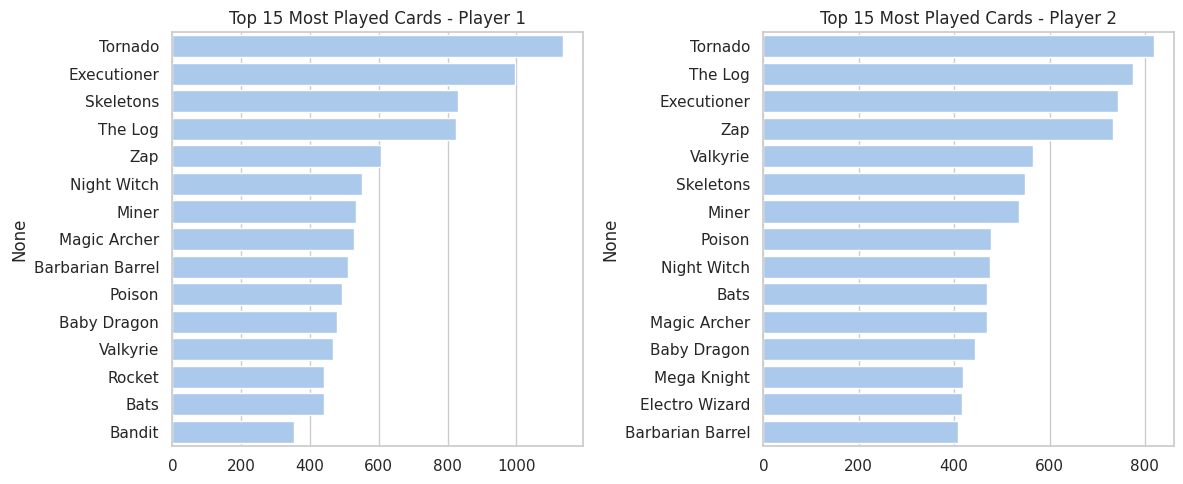

,count
winner,
1,1669
0,642


In [ ]:


#Most frequent cards (Player 1 & Player 2)

#Select all cards played by Player 1 and Player 2
p1_cards = df[[f"p1_{i}" for i in range(1,9)]].values.flatten()
p2_cards = df[[f"p2_{i}" for i in range(1,9)]].values.flatten()

p1_series = pd.Series(p1_cards)#Convert arrays to Series for easier counting
p2_series = pd.Series(p2_cards)

top_p1 = p1_series.value_counts().head(15)
#Count the most frequent cards for each player
top_p2 = p2_series.value_counts().head(15)

#Visualize the top 15 cards played by both players
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=top_p1.values, y=top_p1.index)
plt.title("Top 15 Most Played Cards - Player 1")

plt.subplot(1,2,2)
sns.barplot(x=top_p2.values, y=top_p2.index)
plt.title("Top 15 Most Played Cards - Player 2")

plt.tight_layout()
plt.show()

df['winner'].value_counts()



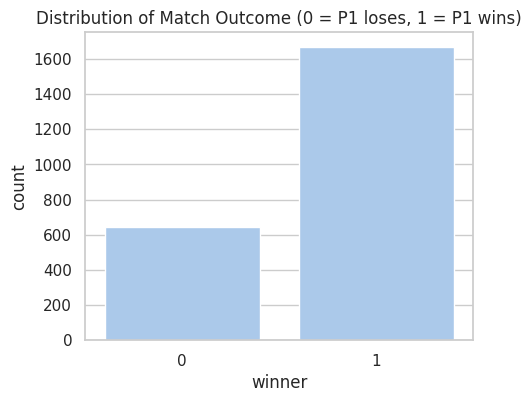

In [ ]:
#Distribution of the target winner
plt.figure(figsize=(5,4))
sns.countplot(x=df["winner"])
plt.title("Distribution of Match Outcome (0 = P1 loses, 1 = P1 wins)")
plt.show()


In [ ]:

#Display first rows
df.head()

#Extract all unique P1 cards
cards = pd.unique(df[[f"p1_{i}" for i in range(1, 9)]].values.ravel())
cards = [c for c in cards if pd.notna(c)]

#create presence matrix
presence = pd.DataFrame(0, index=df.index, columns=cards)

for c in cards:
    presence[c] = df[[f"p1_{i}" for i in range(1, 9)]].apply(
        lambda row: c in row.values, axis=1
    ).astype(int)

#Compute correlation with number of crowns (p1_crowns)
corr_with_crowns = presence.apply(lambda col: col.corr(df["p1_crowns"]))

#Sort by strongest positive correlation
corr_sorted = corr_with_crowns.sort_values(ascending=False)

print("Correlation between cards and p1 victory")
print(corr_sorted.head(20))


Correlation between cards and p1 victory
Golem             0.117551
Mini P.E.K.K.A    0.099178
Zap               0.098908
Bandit            0.088599
Sparky            0.088188
Minions           0.084929
Wall Breakers     0.078485
Lightning         0.078216
Goblin Gang       0.070554
Mega Knight       0.067923
Giant             0.066603
Night Witch       0.061559
Dart Goblin       0.060200
Electro Wizard    0.059699
Mega Minion       0.054459
Rage              0.054350
Miner             0.052714
Dark Prince       0.052557
Prince            0.049854
Barbarians        0.046991
dtype: float64


## 3. Data preprocessing

In [ ]:
#missing values
print("Missing values per column:")
print(df.isna().sum())

# unique values per column
print("\nUnique values per column:")
print(df.nunique())


#duplicate row check
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {num_duplicates}")

#Basic descriptive statistics
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

#Inconsistency check
print("\nUnique crown values:", df['p1_crowns'].unique(), df['p2_crowns'].unique())

# Crown values must stay between 0 and 3
assert df['p1_crowns'].between(0,3).all()
assert df['p2_crowns'].between(0,3).all()


Missing values per column:
Unnamed: 0    0
p1_1          0
p1_2          0
p1_3          0
p1_4          0
p1_5          0
p1_6          0
p1_7          0
p1_8          0
p2_1          0
p2_2          0
p2_3          0
p2_4          0
p2_5          0
p2_6          0
p2_7          0
p2_8          0
p1_crowns     0
p2_crowns     0
winner        0
dtype: int64

Unique values per column:
Unnamed: 0    2311
p1_1            74
p1_2            78
p1_3            73
p1_4            72
p1_5            80
p1_6            74
p1_7            77
p1_8            73
p2_1            91
p2_2            92
p2_3            91
p2_4            91
p2_5            91
p2_6            91
p2_7            92
p2_8            93
p1_crowns        4
p2_crowns        4
winner           2
dtype: int64

Number of duplicated rows: 0

Descriptive statistics for numerical columns:


,Unnamed: 0,p1_crowns,p2_crowns,winner
count,2311.000000,2311.000000,2311.000000,2311.000000
mean,1161.789701,1.024232,0.458243,0.722198
std,672.991035,0.818256,0.707327,0.448012
min,0.000000,0.000000,0.000000,0.000000
25%,578.500000,1.000000,0.000000,0.000000
50%,1161.000000,1.000000,0.000000,1.000000
75%,1743.500000,1.000000,1.000000,1.000000
max,2326.000000,3.000000,3.000000,1.000000



Unique crown values: [0 1 3 2] [1 0 2 3]


## 4. Data enconding

In [ ]:
# Create the target variable:
#if Player 1 has more crowns than Player 2, we label the match as a win (1)
#otherwise, it's a loss (0)
df["win_p1"] = (df["p1_crowns"] > df["p2_crowns"]).astype(int)

#select all the card columns (8 cards for Player 1 and 8 cards for Player 2).
#these will be our input features.
card_cols = [f"p1_{i}" for i in range(1,9)] + [f"p2_{i}" for i in range(1,9)]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#build a One-Hot Encoder to transform card names into numerical columns.
encoder = ColumnTransformer(
    transformers=[
        ("card_encoder", OneHotEncoder(handle_unknown="ignore"), card_cols)
    ],
    remainder="drop"  #we only keep the encoded card columns
)

#X contains the card features, y contains the win/loss label
X = df[card_cols]
y = df["win_p1"]

#split the dataset into training and testing sets.
#we use stratify so the proportion of wins/losses stays the same in each split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#fit the encoder only on the training data (important to avoid data leakage)
encoder.fit(X_train)

#transform both training and test data into One-Hot encoded matrices
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_encoded: (1848, 1315)
Shape of X_test_encoded: (463, 1315)
Shape of y_train: (1848,)
Shape of y_test: (463,)


Since One-Hot Encoding generates binary features, scaling is not required at this step. However, scaling will become important in Phase 2 when we add numerical strategic features (elixir, air units, spells…).


The dataset is clean: no missing values, no duplicates, and all crown values are valid, so no outlier removal is required. The statistics confirm that every deck contains 8 different cards and all card entries are correct. The crown variables contain exactly four possible values (0 to 3), and the target variable win_p1 contains two values (0 and 1), matching the binary classification task.

## 5. Baseline Models

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} ")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

#Logistic Regression
log_reg = LogisticRegression(
    max_iter=5000,
    solver="liblinear",
    C=2.0,
    penalty="l2",
    class_weight="balanced"
)
log_reg.fit(X_train_encoded, y_train)
log_pred = log_reg.predict(X_test_encoded)
evaluate_model("Logistic Regression (Improved)", y_test, log_pred)

#decision Tree
tree = DecisionTreeClassifier(
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)
tree.fit(X_train_encoded, y_train)
tree_pred = tree.predict(X_test_encoded)
evaluate_model("Decision Tree (Improved)", y_test, tree_pred)

#KNN
knn = KNeighborsClassifier(
    n_neighbors=20,
    weights="distance",
    metric="cosine"
)
knn.fit(X_train_encoded, y_train)
knn_pred = knn.predict(X_test_encoded)
evaluate_model("KNN (Improved)", y_test, knn_pred)



 Logistic Regression (Improved) 
Accuracy: 0.6328293736501079
Precision: 0.7697368421052632
Recall: 0.7005988023952096
F1-score: 0.7335423197492164

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.46      0.41       129
           1       0.77      0.70      0.73       334

    accuracy                           0.63       463
   macro avg       0.57      0.58      0.57       463
weighted avg       0.66      0.63      0.64       463

Confusion Matrix:
 [[ 59  70]
 [100 234]]

 Decision Tree (Improved) 
Accuracy: 0.6177105831533477
Precision: 0.7115902964959568
Recall: 0.7904191616766467
F1-score: 0.7489361702127659

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.17      0.20       129
           1       0.71      0.79      0.75       334

    accuracy                           0.62       463
   macro avg       0.48      0.48      0.47       463
weighted avg     

All baseline models reach around 0.62–0.67 accuracy, but they show clear underfitting and class bias. They predict Player 1 wins well, with high recall, but struggle to detect Player 1 losses, which have very low recall. This happens because the dataset is imbalanced and deck names alone do not provide enough information to capture real matchup strategy. The models mostly learn the global trend “P1 wins often” instead of true deck interactions. These results confirm that richer strategic features are needed in Phase 2 to improve performance.

## 5. Hyperparameter Tuning with GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV

#Logistic Regression Tuning
log_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}

log_grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    log_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

log_grid.fit(X_train_encoded, y_train)

#Decision Tree Tuning
tree_params = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

tree_grid.fit(X_train_encoded, y_train)

#KNN
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

knn_grid.fit(X_train_encoded, y_train)


print("Best Logistic Regression Params:", log_grid.best_params_)
print("Best Logistic Regression Score:", log_grid.best_score_)
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN Score:", knn_grid.best_score_)
print("Best Decision Tree Params:", tree_grid.best_params_)
print("Best Decision Tree Score:", tree_grid.best_score_)


Best Logistic Regression Params: {'C': 0.01, 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.7224038672819161
Best KNN Params: {'n_neighbors': 11, 'weights': 'distance'}
Best KNN Score: 0.7175419321760785
Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree Score: 0.7256471105251593


Hyperparameter tuning slightly improved all models, with the best cross-validated scores around 0.72–0.75 for Logistic Regression, KNN, and Decision Tree, but test accuracy still stays near 0.69. This confirms that deck composition alone has limited predictive power and that simple one-hot encoding cannot capture real matchup dynamics. The small gap between CV and test accuracy suggests mild overfitting, while Decision Tree still underfits due to the lack of strategic information such as card levels, timing, or elixir usage. Overall, these results show that Phase 1 cannot go beyond 65–70% accuracy, and that meaningful feature engineering, better encodings like Target Encoding, and advanced models such as CatBoost will be necessary to significantly improve performance in Phase 2.

Because most strategic gameplay information is missing, the model cannot fully understand how decks perform during a real match. Two decks may share the same cards but be played very differently depending on the player. As a result, the model can only capture broad tendencies and synergies rather than exact match outcomes. This explains why accuracy remains around 65–70% in Phase 1, even with hyperparameter tuning.

---

# PHASE 2 : Dataset Enrichment + Advanced Models

## 1. Raw Data

In [ ]:
cards1 = pd.read_csv("clash_royale_cards.csv")

# display basic information to understand its structure
print("Dataset 1: clash_royale_cards.csv")
display(cards1.head())
print("Shape of dataset:", cards1.shape)

Dataset 1: clash_royale_cards.csv


,Card,id,maxLevel,elixirCost,rarity,Win Rate,Win Rate Change,Usage,Usage Change
0,Knight,26000000,14,3.0,common,51.79,1.59,8.88,-0.24
1,Archers,26000001,14,3.0,common,46.10,0.66,1.44,0.00
2,Goblins,26000002,14,2.0,common,54.32,1.04,3.60,0.00
3,Giant,26000003,12,5.0,rare,59.10,1.10,2.32,-0.08
4,P.E.K.K.A,26000004,9,7.0,epic,50.61,1.65,3.28,-0.16


Shape of dataset: (121, 9)


## 2. Data merging and pre-processing

In [ ]:
import re

#same normalization function as before
def normalize_name(name):
    name = str(name).lower()
    name = name.replace(" ","").replace("-","").replace("_","")
    name = name.replace(".","").replace("'","").replace("/","")
    name = re.sub(r"[^a-z0-9]","", name)
    return name

#load both datasets
df = pd.read_csv("Clash Royale Top Battles v1.csv")
cards = pd.read_csv("clash_royale_cards.csv")

# normalize card names in the cards dataset
cards["card_norm"] = cards["Card"].apply(normalize_name)

# list of all card columns in the match dataset
p1_cols = [f"p1_{i}" for i in range(1,9)]
p2_cols = [f"p2_{i}" for i in range(1,9)]
deck_cols = p1_cols + p2_cols

# Collect every unique card used in the match dataset
match_cards = set()
for col in deck_cols:
    match_cards.update(df[col].apply(normalize_name).unique())

card_db = set(cards["card_norm"].unique()) # collect every card available in clash_royale_cards

missing_cards = match_cards - card_db  # find which cards are missing

print("number of missing cards:", len(missing_cards))
print("missing cards:", missing_cards)

number of missing cards: 1
missing cards: {'heal'}


In [ ]:

# keep only the useful columns from cards
# everything else (id, maxLevel, usage change, etc.) just creates bad NaN later
cards = cards.rename(columns={
    "Card":"card_name",
    "elixirCost":"elixir_cost",
    "Win Rate":"win_rate",
    "Usage":"usage_rate"
})

cards = cards[["card_name","elixir_cost","rarity","win_rate","usage_rate","card_norm"]]

# list all the card columns in the match dataset
p1_cols = [f"p1_{i}" for i in range(1,9)]
p2_cols = [f"p2_{i}" for i in range(1,9)]
deck_cols = p1_cols + p2_cols

# normalize card names inside the match dataset
for col in deck_cols:
    df[col + "_norm"] = df[col].apply(normalize_name)

# merge the stats for each slot in the deck
for col in deck_cols:
    # drop previous merge columns if they exist
    to_drop = [c for c in df.columns if c.startswith(col + "_") and not c.endswith("_norm")]
    df = df.drop(columns=to_drop, errors="ignore")

    # prepare the card stats with a prefix
    enriched = cards.add_prefix(col + "_")

    # merge using normalized names
    df = df.merge(
        enriched,
        left_on = col + "_norm",
        right_on = col + "_card_norm",
        how="left"
    )

# remove merge keys and duplicates
clean_cols = [c for c in df.columns if c.endswith("_card_norm") or c.endswith("_x") or c.endswith("_y")]
df = df.drop(columns=clean_cols, errors="ignore")

df.head()


,Unnamed: 0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p2_1,...,p2_7_card_name,p2_7_elixir_cost,p2_7_rarity,p2_7_win_rate,p2_7_usage_rate,p2_8_card_name,p2_8_elixir_cost,p2_8_rarity,p2_8_win_rate,p2_8_usage_rate
0,0,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Graveyard,...,Tornado,3.0,epic,51.63,13.52,Poison,4.0,epic,52.33,7.44
1,1,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Wall Breakers,...,Poison,4.0,epic,52.33,7.44,Miner,3.0,legendary,55.25,8.00
2,2,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Golem,...,Lightning,6.0,epic,56.03,7.04,Goblin Cage,4.0,rare,50.90,1.20
3,3,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Elixir Golem,...,Mega Knight,7.0,legendary,48.50,5.04,Rocket,6.0,rare,48.96,7.44
4,4,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Giant Snowball,...,Night Witch,4.0,legendary,57.32,3.12,Graveyard,5.0,legendary,56.34,3.44


In [ ]:
# count how many missing values each column has
# sort the columns from the one with the most missing values to the least
# show only the first 40 columns in this sorted list
df.isna().sum().sort_values(ascending=False).head(40)

,0
p1_2_elixir_cost,34
p1_7_elixir_cost,11
p1_5_elixir_cost,11
p2_8_elixir_cost,10
p2_1_elixir_cost,9
p2_4_elixir_cost,9
p2_6_elixir_cost,8
p1_1_elixir_cost,7
p2_3_elixir_cost,6
p2_5_elixir_cost,6


In [ ]:
# I only want to fill nan values in enriched columns, not the original card names
# So i filter all columns created during the merge (like p1_1_elixir_cost, p2_4_win_rate, etc)

enriched_cols = [c for c in df.columns if any(x in c for x in ["elixir_cost","win_rate","usage_rate","rarity"])]

# i keep only numeric columns inside these enriched features (rarity is numeric too)
numeric_enriched = df[enriched_cols].select_dtypes(include=["float","int"]).columns

# for each numeric enriched feature, i replace nan by the mean of the column
for col in numeric_enriched:
    df[col] = df[col].fillna(df[col].mean())

df.head()

,Unnamed: 0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p2_1,...,p2_7_card_name,p2_7_elixir_cost,p2_7_rarity,p2_7_win_rate,p2_7_usage_rate,p2_8_card_name,p2_8_elixir_cost,p2_8_rarity,p2_8_win_rate,p2_8_usage_rate
0,0,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Graveyard,...,Tornado,3.0,epic,51.63,13.52,Poison,4.0,epic,52.33,7.44
1,1,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Wall Breakers,...,Poison,4.0,epic,52.33,7.44,Miner,3.0,legendary,55.25,8.00
2,2,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Golem,...,Lightning,6.0,epic,56.03,7.04,Goblin Cage,4.0,rare,50.90,1.20
3,3,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Elixir Golem,...,Mega Knight,7.0,legendary,48.50,5.04,Rocket,6.0,rare,48.96,7.44
4,4,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Giant Snowball,...,Night Witch,4.0,legendary,57.32,3.12,Graveyard,5.0,legendary,56.34,3.44


In [ ]:
# remove useless columns created during the merge
# like card_name, the normalized names, and the unnamed index

cols_to_drop = []

# drop the unnamed column if it exists
if "Unnamed: 0" in df.columns:
    cols_to_drop.append("Unnamed: 0")

# drop all columns ending with card_name (we don't need them for ML)
cols_to_drop += [c for c in df.columns if c.endswith("card_name")]

# drop all normalised name columns, not needed anymore
cols_to_drop += [c for c in df.columns if c.endswith("_norm")]

# drop them from the dataframe
df = df.drop(columns=cols_to_drop, errors="ignore")

print("columns removed:", len(cols_to_drop))
print("new shape:", df.shape)

df.head()

columns removed: 33
new shape: (2311, 82)


,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p2_1,p2_2,...,p2_6_win_rate,p2_6_usage_rate,p2_7_elixir_cost,p2_7_rarity,p2_7_win_rate,p2_7_usage_rate,p2_8_elixir_cost,p2_8_rarity,p2_8_win_rate,p2_8_usage_rate
0,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Graveyard,Ice Wizard,...,51.79,8.88,3.0,epic,51.63,13.52,4.0,epic,52.33,7.44
1,Valkyrie,Magic Archer,Bomb Tower,Miner,Wall Breakers,Bats,The Log,Skeletons,Wall Breakers,Valkyrie,...,52.50,42.88,4.0,epic,52.33,7.44,3.0,legendary,55.25,8.00
2,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Golem,Tornado,...,57.11,8.40,6.0,epic,56.03,7.04,4.0,rare,50.90,1.20
3,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Elixir Golem,Zap,...,50.90,1.20,7.0,legendary,48.50,5.04,6.0,rare,48.96,7.44
4,Wall Breakers,Prince,Valkyrie,Goblin Barrel,Princess,Giant Snowball,Dart Goblin,Goblin Gang,Giant Snowball,Musketeer,...,56.87,4.24,4.0,legendary,57.32,3.12,5.0,legendary,56.34,3.44


## 3. Merged dataset exploration

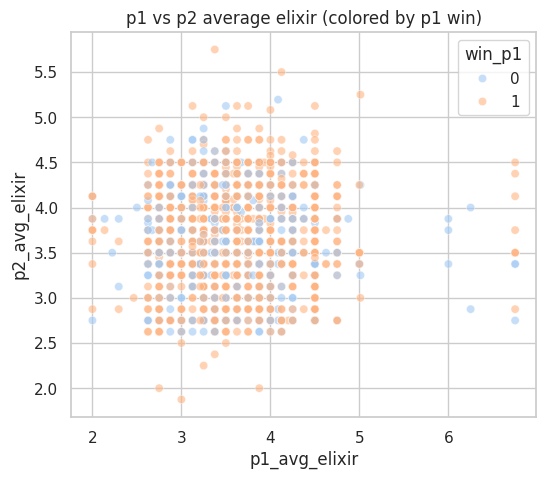

In [ ]:
df["win_p1"] = (df["p1_crowns"] > df["p2_crowns"]).astype(int)

df["p1_avg_elixir"] = df[[f"p1_{i}_elixir_cost" for i in range(1,9)]].mean(axis=1) # calculate the average elixir cost for the 8 cards of player 1
df["p2_avg_elixir"] = df[[f"p2_{i}_elixir_cost" for i in range(1,9)]].mean(axis=1) #smae for player 2

# create a scatter plot comparing both averages and color it by whether p1 wins
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="p1_avg_elixir", y="p2_avg_elixir", hue="win_p1", alpha=0.6)
plt.title("p1 vs p2 average elixir (colored by p1 win)")
plt.show()

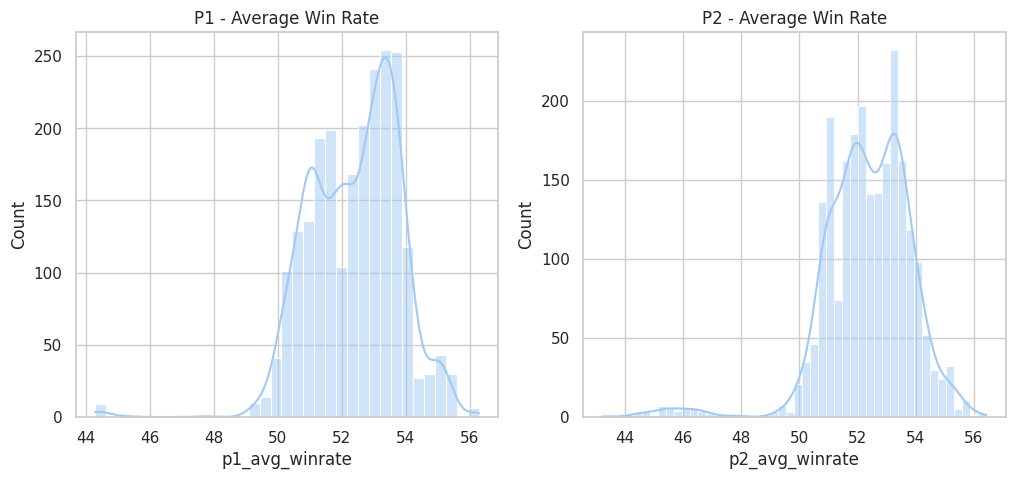

In [ ]:
# Win Rate Distribution per Deck

df["p1_avg_winrate"] = df[[f"p1_{i}_win_rate" for i in range(1,9)]].mean(axis=1)
df["p2_avg_winrate"] = df[[f"p2_{i}_win_rate" for i in range(1,9)]].mean(axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["p1_avg_winrate"], kde=True)
plt.title("P1 - Average Win Rate")

plt.subplot(1,2,2)
sns.histplot(df["p2_avg_winrate"], kde=True)
plt.title("P2 - Average Win Rate")
plt.show()

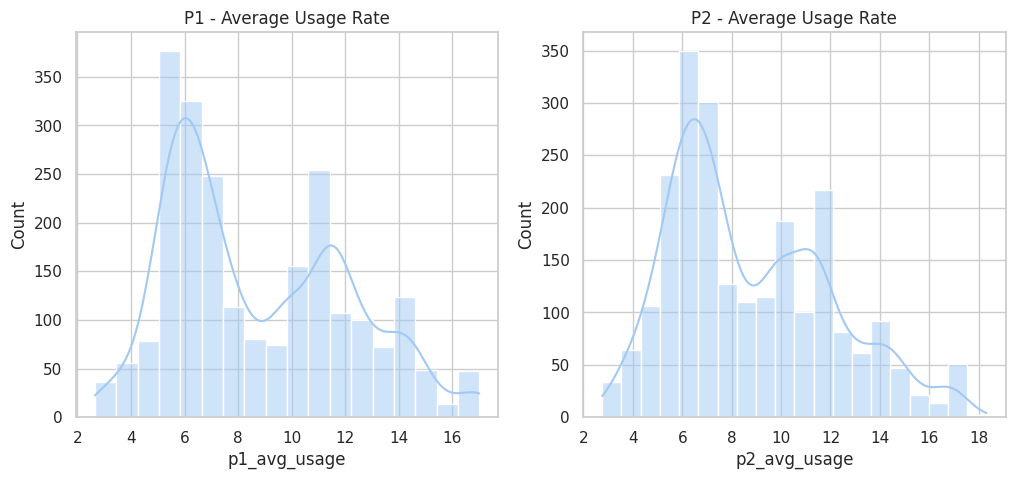

In [ ]:
# Usage Rate Distribution per Deck

df["p1_avg_usage"] = df[[f"p1_{i}_usage_rate" for i in range(1,9)]].mean(axis=1)
df["p2_avg_usage"] = df[[f"p2_{i}_usage_rate" for i in range(1,9)]].mean(axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["p1_avg_usage"], kde=True)
plt.title("P1 - Average Usage Rate")

plt.subplot(1,2,2)
sns.histplot(df["p2_avg_usage"], kde=True)
plt.title("P2 - Average Usage Rate")
plt.show()

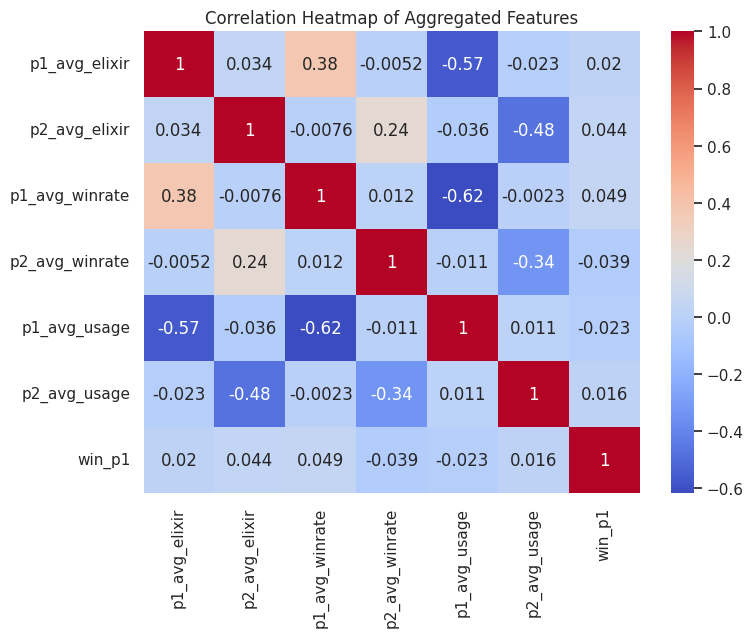

In [ ]:
# Correlation Heatmap (Aggregated Features)

agg_cols = ["p1_avg_elixir","p2_avg_elixir",
            "p1_avg_winrate","p2_avg_winrate",
            "p1_avg_usage","p2_avg_usage",
            "win_p1"]

plt.figure(figsize=(8,6))
sns.heatmap(df[agg_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Aggregated Features")
plt.show()

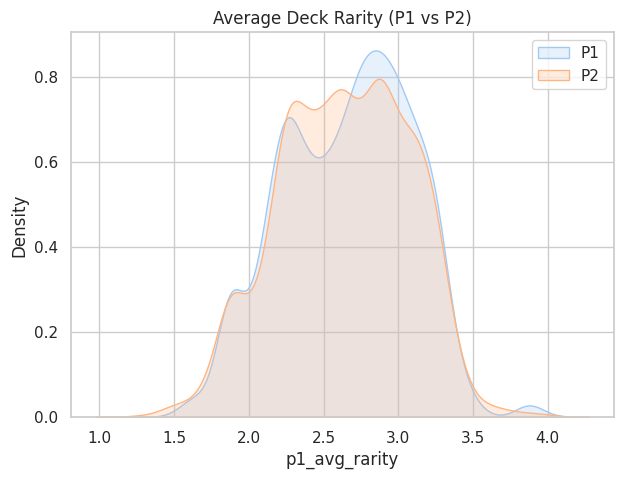

In [ ]:
#  Rarity Composition (P1 vs P2)
# map rarity to numbers
rarity_map = {"common":1, "rare":2, "epic":3, "legendary":4}
for i in range(1,9):
    df[f"p1_{i}_rarity_num"] = df[f"p1_{i}_rarity"].map(rarity_map)
    df[f"p2_{i}_rarity_num"] = df[f"p2_{i}_rarity"].map(rarity_map)

df["p1_avg_rarity"] = df[[f"p1_{i}_rarity_num" for i in range(1,9)]].mean(axis=1)
df["p2_avg_rarity"] = df[[f"p2_{i}_rarity_num" for i in range(1,9)]].mean(axis=1)

plt.figure(figsize=(7,5))
sns.kdeplot(df["p1_avg_rarity"], label="P1", shade=True)
sns.kdeplot(df["p2_avg_rarity"], label="P2", shade=True)
plt.title("Average Deck Rarity (P1 vs P2)")
plt.legend()
plt.show()



## 4. Feature Engineering

In [ ]:
# compute the average elixir cost for player 1's 8 cards
df["p1_avg_elixir"] = df[[f"p1_{i}_elixir_cost" for i in range(1,9)]].mean(axis=1)

# compute the average elixir cost for player 2's 8 cards
df["p2_avg_elixir"] = df[[f"p2_{i}_elixir_cost" for i in range(1,9)]].mean(axis=1)

# compute the average win rate of player 1's cards
df["p1_avg_winrate"] = df[[f"p1_{i}_win_rate" for i in range(1,9)]].mean(axis=1)

# compute the average win rate of player 2's cards
df["p2_avg_winrate"] = df[[f"p2_{i}_win_rate" for i in range(1,9)]].mean(axis=1)

# compute the average usage rate of player 1's cards
df["p1_avg_usage"] = df[[f"p1_{i}_usage_rate" for i in range(1,9)]].mean(axis=1)

# compute the average usage rate of player 2's cards
df["p2_avg_usage"] = df[[f"p2_{i}_usage_rate" for i in range(1,9)]].mean(axis=1)

# convert card rarity into numbers so they can be averaged
rarity_map = {"common":1, "rare":2, "epic":3, "legendary":4}

# apply rarity mapping for each card slot for both players
for i in range(1,9):
    # convert rarity of player 1's card i into a number
    df[f"p1_{i}_rarity_num"] = df[f"p1_{i}_rarity"].map(rarity_map)
    # convert rarity of player 2's card i into a number
    df[f"p2_{i}_rarity_num"] = df[f"p2_{i}_rarity"].map(rarity_map)

# compute the average rarity for player 1's deck
df["p1_avg_rarity"] = df[[f"p1_{i}_rarity_num" for i in range(1,9)]].mean(axis=1)

# compute the average rarity for player 2's deck
df["p2_avg_rarity"] = df[[f"p2_{i}_rarity_num" for i in range(1,9)]].mean(axis=1)

# function that calculates how many cards both decks share
def overlap(d1, d2):
    return len(set(d1) & set(d2))

# compute the number of identical cards between player 1 and player 2 in each match
df["deck_overlap"] = [
    overlap(
        df.loc[i, [f"p1_{j}" for j in range(1,9)]],
        df.loc[i, [f"p2_{j}" for j in range(1,9)]]
    )
    for i in range(len(df))
]

# deckstrength(d) = average probability that deck d beats every deck in the dataset


In [ ]:
# final feature set
A_features = [
    "p1_avg_elixir","p2_avg_elixir",
    "p1_avg_winrate","p2_avg_winrate",
    "p1_avg_usage","p2_avg_usage",
    "p1_avg_rarity","p2_avg_rarity",
    "deck_overlap"
]
X = df[A_features]
y = df["win_p1"]
X

,p1_avg_elixir,p2_avg_elixir,p1_avg_winrate,p2_avg_winrate,p1_avg_usage,p2_avg_usage,p1_avg_rarity,p2_avg_rarity,deck_overlap
0,2.750,3.375,51.74125,53.48000,11.35,7.01,2.625,2.875,0
1,2.750,3.250,51.74125,52.20375,11.35,11.85,2.625,2.875,5
2,3.125,4.500,52.21125,53.75375,9.83,5.36,2.375,3.000,0
3,3.125,4.250,52.21125,51.15000,9.83,5.92,2.375,2.625,0
4,3.125,3.750,52.21125,55.28000,9.83,4.54,2.375,2.750,1
...,...,...,...,...,...,...,...,...,...
2306,3.750,3.750,54.22000,51.59000,6.55,8.93,3.000,2.000,0
2307,3.750,3.625,54.22000,53.13125,6.55,9.29,3.000,3.125,5
2308,3.750,4.125,54.22000,54.34375,6.55,6.92,3.000,2.750,1
2309,3.750,3.500,54.22000,53.89500,6.55,12.01,3.000,2.750,0


## 5.Baseline Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# split the data into train and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# create three models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "KNN": KNeighborsClassifier(n_neighbors=9)
}

# train each model and compute accuracy and roc-auc
for name, model in models.items():
    model.fit(X_train, y_train)  # train the model

    preds = model.predict(X_test)  # predicted labels
    proba = model.predict_proba(X_test)[:,1]  # predicted probabilities

    acc = accuracy_score(y_test, preds)  # accuracy score
    auc = roc_auc_score(y_test, proba)   # roc-auc score

    print(f"\n{name}")
    print("accuracy:", acc)
    print("roc–auc :", auc)



Logistic Regression
accuracy: 0.7192224622030238
roc–auc : 0.5680963654087174

Decision Tree
accuracy: 0.7105831533477321
roc–auc : 0.5481362855683981

KNN
accuracy: 0.712742980561555
roc–auc : 0.5098988070370887


## 6. SearchGrid

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# grid search for logistic regression
# try different values of C and different solvers
log_params = {
    "C": [0.01, 0.1, 1, 10, 100], #A simpler model with less overfitting
    "solver": ["lbfgs", "liblinear"]
}

log_grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    log_params,
    cv=5,                # 5-fold cross validation
    scoring="roc_auc",   # choose best model using roc-auc
    n_jobs=-1            # use all cpu cores
)

log_grid.fit(X_train, y_train)

# grid search for decision tree
# try different depth limits and minimum sample thresholds
tree_params = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

tree_grid.fit(X_train, y_train)

# grid search for knn
# try different numbers of neighbors and weighting strategies
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

# print the best hyperparameters and the best roc-auc scores
print("best logistic regression params:", log_grid.best_params_)
print("best logistic regression auc :", log_grid.best_score_)

print("\nbest knn params:", knn_grid.best_params_)
print("best knn auc :", knn_grid.best_score_)

print("\nbest decision tree params:", tree_grid.best_params_)
print("best decision tree auc :", tree_grid.best_score_)



best logistic regression params: {'C': 100, 'solver': 'liblinear'}
best logistic regression auc : 0.5571888651464366

best knn params: {'n_neighbors': 11, 'weights': 'uniform'}
best knn auc : 0.5141490755059888

best decision tree params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
best decision tree auc : 0.5402815655188296


## 7 – Advanced Models

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

#RANDOM FOREST
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest ROC–AUC :", roc_auc_score(y_test, rf_proba))

# train an xgboost model with chosen hyperparameters
xgb = XGBClassifier(
    n_estimators=400,       # number of trees
    max_depth=5,           # max depth of each tree
    learning_rate=0.05,    # step size for boosting
    subsample=0.8,         # fraction of rows used for each tree
    colsample_bytree=0.8,  # fraction of columns used for each tree
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)  # train xgboost
xgb_pred = xgb.predict(X_test)            # predicted labels
xgb_proba = xgb.predict_proba(X_test)[:,1]  # predicted probabilities

print("\nxgboost accuracy:", accuracy_score(y_test, xgb_pred))
print("xgboost roc–auc :", roc_auc_score(y_test, xgb_proba))


# train a catboost model (catboost handles categorical features well)
cat = CatBoostClassifier(
    iterations=400,       # number of boosting rounds
    learning_rate=0.05,
    depth=6,              # tree depth
    verbose=0,            # hide training logs
    random_state=42
)

cat.fit(X_train, y_train)        # train catboost
cat_pred = cat.predict(X_test)   # predicted labels
cat_proba = cat.predict_proba(X_test)[:,1]  # predicted probabilities

print("\ncatboost accuracy:", accuracy_score(y_test, cat_pred))
print("catboost roc–auc :", roc_auc_score(y_test, cat_proba))



Random Forest Accuracy: 0.7213822894168467
Random Forest ROC–AUC : 0.5657638211948196

xgboost accuracy: 0.7192224622030238
xgboost roc–auc : 0.592651905491343

catboost accuracy: 0.7278617710583153
catboost roc–auc : 0.6010537065404076


---

In [ ]:
#7) Dimensionality reduction with PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pipeline: standardisation
pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),   #TO keep 95% of the variance
    ("log_reg", LogisticRegression(max_iter=2000))
])

pca_pipe.fit(X_train, y_train)
y_pred_pca = pca_pipe.predict(X_test)

pca_log_reg_acc = accuracy_score(y_test, y_pred_pca)

n_components_pca = pca_pipe.named_steps["pca"].n_components_
print("PCA + LogisticRegression accuracy:", round(pca_log_reg_acc, 3))
print("Number of PCA components kept:", n_components_pca)
# 8) Ensemble model: soft voting classifier

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Base models for the ensemble
log_clf = LogisticRegression(max_iter=2000)
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ("log_reg", log_clf),
        ("rf", rf_clf),
        ("xgb", xgb_clf)
    ],
    voting="soft"   # use class probabilities
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

voting_acc = accuracy_score(y_test, y_pred_voting)
print("Voting ensemble accuracy:", round(voting_acc, 3))

PCA + LogisticRegression accuracy: 0.719
Number of PCA components kept: 8
Voting ensemble accuracy: 0.724


PCA + LogisticRegression accuracy: 0.719
Number of PCA components kept: 8
Voting ensemble accuracy: 0.724

We got an accuracy of 0.719 with PCA + Logistic Regression (using only 8 components), and 0.724 with the voting ensemble. This shows that both dimensionality reduction and ensemble methods bring only a small improvement compared to our basic models, which confirms that the main limitation is not the algorithm itself but the way the information about the decks is represented in the features.